# Perceptron using scikit-learn

Train a Perceptron model using scikit-learn API. Due to scikit-learn's OvR (One-versus-Rest) algorithm, it supports multi-classification.

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
x = iris.data[:, [2, 3]]
y = iris.target
print('class label:', np.unique(y))

class label: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def std_preprocessing(x, y, test_size=0.3, seed=1):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, stratify=y, random_state=seed)
    ss = StandardScaler()
    x_train_std = ss.fit_transform(x_train)
    x_test_std = ss.transform(x_test)
    return x_train_std, x_test_std, y_train, y_test
x_train_std, x_test_std, y_train, y_test = std_preprocessing(x, y)

In [3]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(x_train_std, y_train)
y_pred = ppn.predict(x_test_std)
print('test accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
# print('test accuracy: %.3f' % ppn.score(X_test_std, y_test))

test accuracy: 0.978


Visualize the decision boundary of iris dataset.

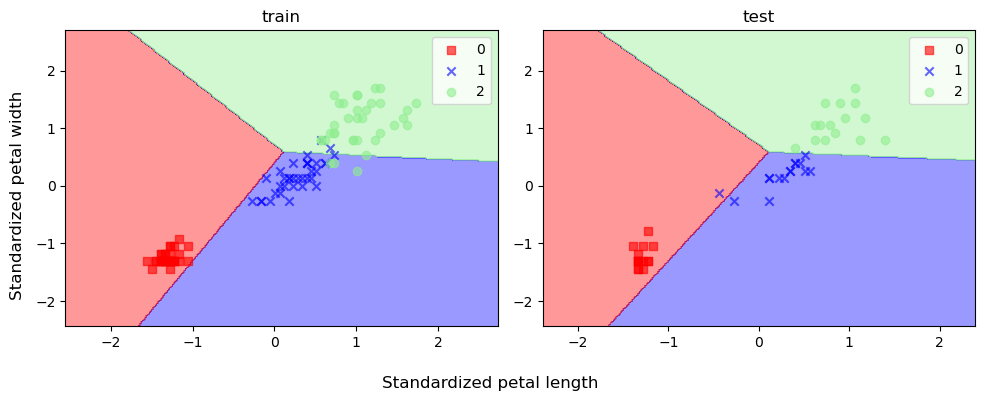

In [4]:
import utils
utils.visualize_decision_boundary(x_train_std, y_train, classifier=ppn, \
                                  x_test=x_test_std, y_test=y_test, \
                                  xlabel='Standardized petal length', ylabel='Standardized petal width')

# Logistic Regression

Visualize how **sigmoid function** looks like and understand the concept of logistic regression.

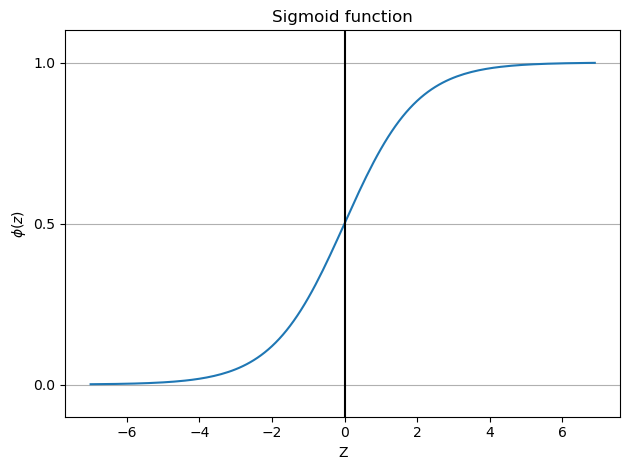

In [5]:
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color="k")
plt.ylim((-0.1, 1.1))
plt.title("Sigmoid function")
plt.xlabel("Z")
plt.ylabel("$\phi (z)$")
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

Visualize the loss function of logistic regression. The function below indicates that if the prediction is correct (pred. 0 & true 0 or vice versa), there will be a zero cost (means no update on weights). However if it misses the true value, there will be a huge penalization.

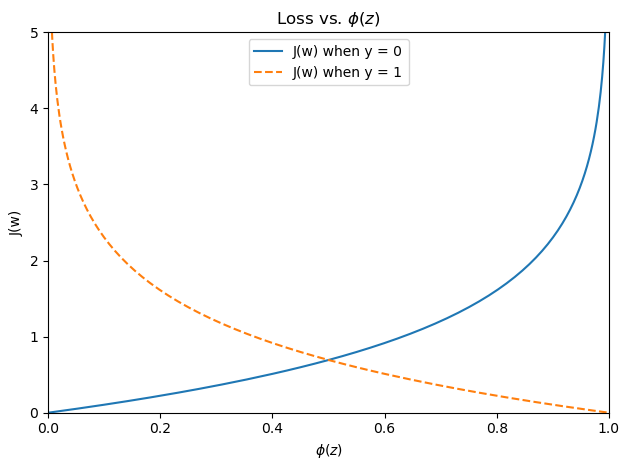

In [6]:
def loss_0(z):
    return -np.log(1-sigmoid(z))
def loss_1(z):
    return -np.log(sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
l_0 = [loss_0(l) for l in z]
plt.plot(phi_z, l_0, label="J(w) when y = 0")
l_1 = [loss_1(l) for l in z]
plt.plot(phi_z, l_1, label="J(w) when y = 1", linestyle='--')
plt.xlim((0, 1))
plt.ylim((0, 5))
plt.title("Loss vs. $\phi (z)$")
plt.xlabel("$\phi (z)$")
plt.ylabel("J(w)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

Define a **LogisticRegression** API.

In [7]:
class LogisticRegression(object):
    """
    lr: learning rate
    epochs: number of iterations
    random_state: seed
    """
    def __init__(self, lr=0.03, epochs=1000, random_state=1):
        self.lr = lr
        self.epochs = epochs
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        w_size = 1 + X.shape[1]
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=w_size)
        self.cost_ = []
        for _ in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.lr * X.T.dot(errors)
            self.w_[0] += self.lr * errors.sum()
            cost = (-y.dot(np.log(output)) - (1-y).dot(np.log(1-output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

Train a logistic regression model for iris dataset (for self-defined API, only binary classification is applicable).

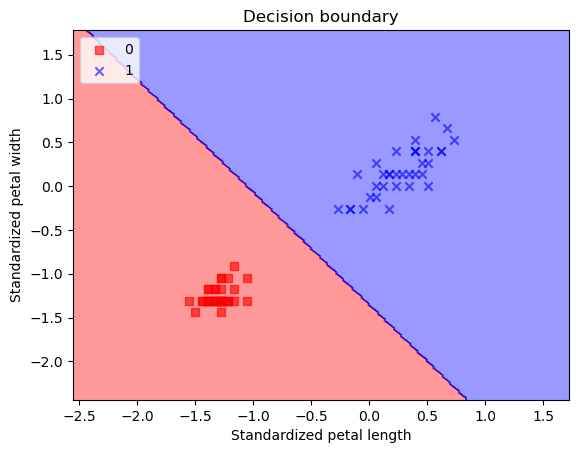

In [8]:
x_train_std_bi = x_train_std[(y_train == 0) | (y_train == 1)]
y_train_bi = y_train[(y_train == 0) | (y_train == 1)]
logistic = LogisticRegression()
logistic.fit(x_train_std_bi, y_train_bi)
fig, ax = plt.subplots()
utils.plot_decision_boundary(ax, x_train_std_bi, y_train_bi, classifier=logistic)
plt.title("Decision boundary")
plt.xlabel("Standardized petal length")
plt.ylabel("Standardized petal width")
plt.legend(loc="upper left")
plt.show()

Again, but train a logistic regression model using scikit-learn API.

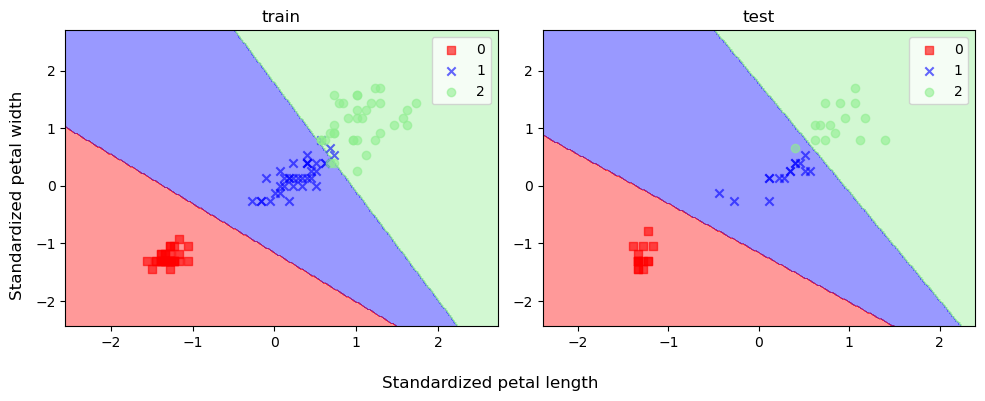

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(x_train_std, y_train)
utils.visualize_decision_boundary(x_train_std, y_train, classifier=lr, \
                                  x_test=x_test_std, y_test=y_test, \
                                  xlabel="Standardized petal length", ylabel="Standardized petal width")

Output the test accuracy of logistic regression model.

In [10]:
print("test accuracy: %.3f" % lr.score(x_test_std, y_test))

test accuracy: 0.978


Display the prediction of first 5 test samples. Then, using `argmax` function to return the class label of maximum value in each row. The index of the array corresponds to the class label of iris dataset.

In [11]:
lr.predict_proba(x_test_std[:5, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17],
       [3.79431985e-06, 9.04401285e-01, 9.55949212e-02],
       [5.22212406e-05, 9.94209099e-01, 5.73867966e-03]])

In [12]:
lr.predict_proba(x_test_std[:5, :]).argmax(axis=1)
# lr.predict(X_test_std[:5, :])

array([2, 0, 0, 1, 1], dtype=int64)

# Support Vector Machine

Support vector machine (SVM) finds the maximum margin separating hyperplane. The margin in SVM is the distance from separating hyperplane to the closest sample in either class. Those samples are called support vectors. The reason for finding large margin is that SVM with maximum margin tends to generalize better on the dataset whereas small margin will eventually make the model become ovefitting on the dataset.

Reference: https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote09.html

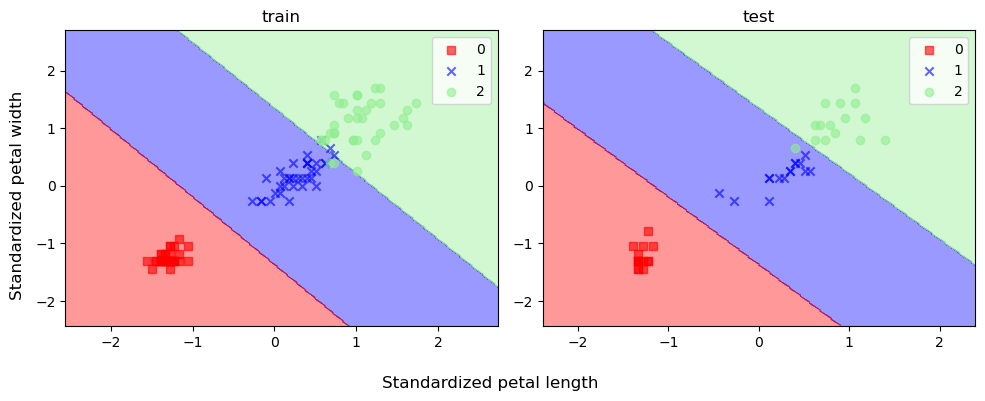

In [13]:
from sklearn.svm import SVC
svm = SVC(kernel="linear", C=1.0, random_state=1)
svm.fit(x_train_std, y_train)
utils.visualize_decision_boundary(x_train_std, y_train, classifier=svm, \
                                  x_test=x_test_std, y_test=y_test, \
                                  xlabel="Standardized petal length", ylabel="Standardized petal width")

# Kernel SVM

How about non-linear dataset that cannot find separating hyperplane (in 2D, hyperplane is a line) to classify each class? One of the reasons why SVM algorithm is well-used in a lot of industries is that it can also handle non-linear classification by using the **kernel trick**.

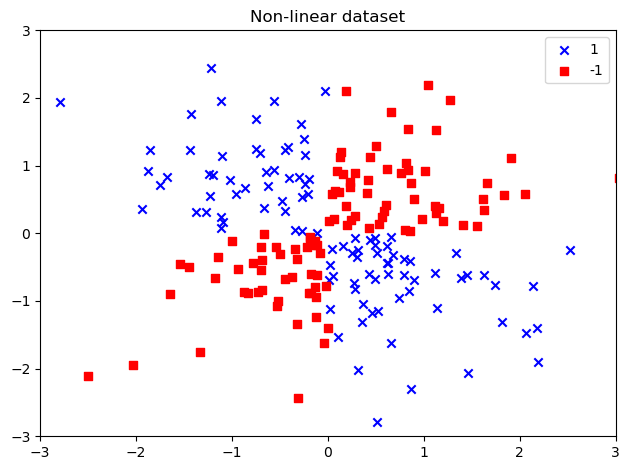

In [14]:
np.random.seed(1)
x_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(x_xor[:, 0] > 0, x_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(x_xor[y_xor == 1, 0], x_xor[y_xor == 1, 1], c = "b", marker="x", label="1")
plt.scatter(x_xor[y_xor == -1, 0], x_xor[y_xor == -1, 1], c = "r", marker="s", label="-1")
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.title("Non-linear dataset")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

Simply, we need to utilize mapping function $\phi$ to project non-linear dataset to the higher and transformable dimensional space. Then in the higher dimentional space, those projected features can be linearly separated by using linear SVM model.

After obtaining a set of weights and decision boundary hyperplane through model training, just transform the dataset back to the original dimensional space using the same mapping function $\phi$. In doing so, we can use the model for non-linear classification.

However, the computation of mapping function $\phi$ (dot product of vectors) is extremely complicated and cost-consuming as the dimentional space gets higher and higher. Therefore, we use so-called a kernel trick, known as kernel function **k**, to reduce the cost of dot product computation between two points in the higher dimensional space.

Refernce: https://stats.stackexchange.com/questions/152897/how-to-intuitively-explain-what-a-kernel-is & https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200

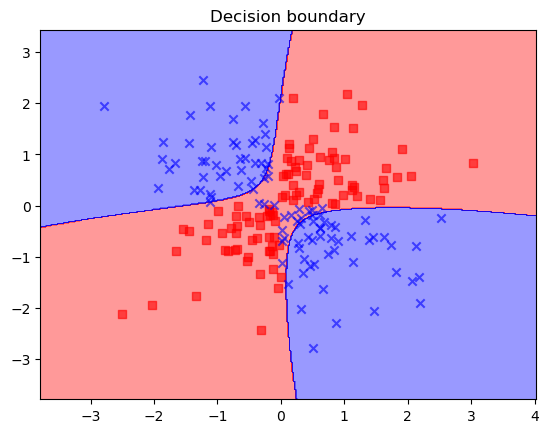

In [15]:
# RBF stands for Radial Basis Function, known as Gaussian kernel
# gamma is a parameter for limiting the size of Gaussian sphere
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10.0)
svm.fit(x_xor, y_xor)
fig, ax = plt.subplots()
utils.plot_decision_boundary(ax, x_xor, y_xor, classifier=svm)
plt.title("Decision boundary")
plt.show()

Train a kernel SVM model using iris dataset.

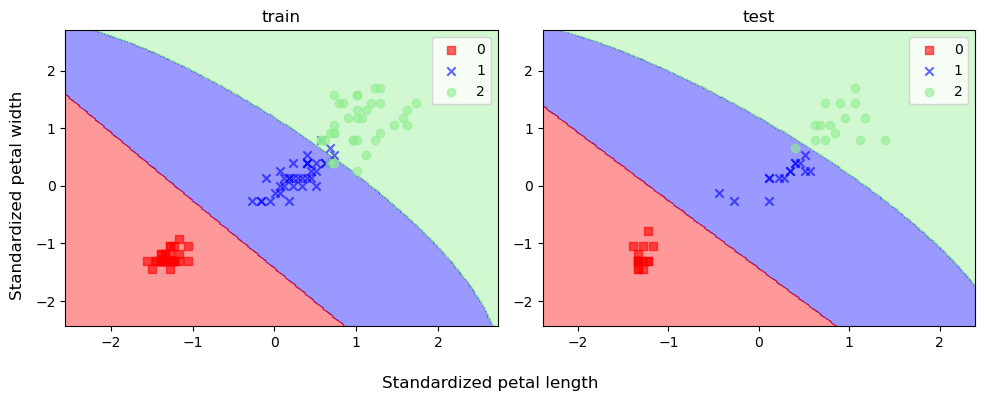

In [16]:
k_svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10.0)
k_svm.fit(x_train_std, y_train)
utils.visualize_decision_boundary(x_train_std, y_train, classifier=k_svm, \
                                  x_test=x_test_std, y_test=y_test, \
                                  xlabel="Standardized petal length", ylabel="Standardized petal width")

# Decision Tree

Decision tree is a process of making decisions based on the given features to classify two or more class labels. The objective function of this algorithm is to decide which features to use in each node in order to maximize the **information gain**.

The mathematical interpretation of information gain is defined as follows:

$IG(D_p, f) = I(D_p) - \sum_{j=1}^m {N_j \over N_p} I(D_j)$

where f is a feature, D_p and D_j are the dataset of parent and j-th child node respectively and I is an impurity. There are three most commonly used impurity parameters known as **gini impurity**, **entropy** and **classification error**.

Reference: https://scikit-learn.org/stable/modules/tree.html

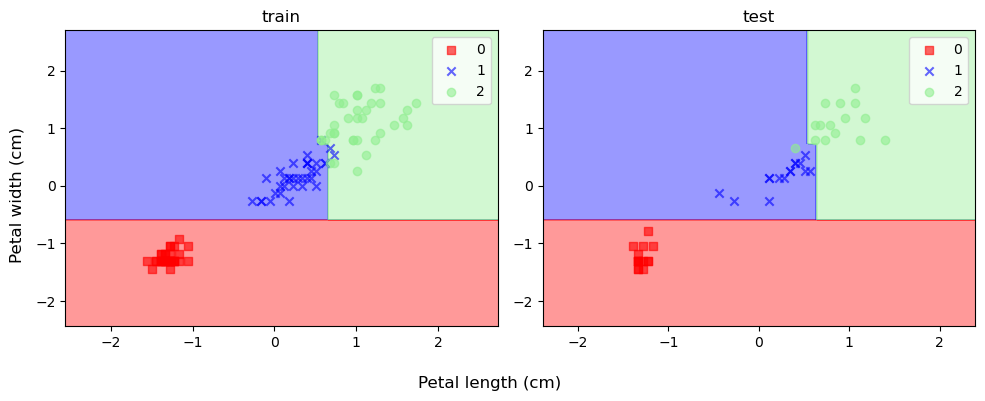

In [17]:
from sklearn.tree import DecisionTreeClassifier
# pruning the tree by setting the max depth of the tree equals to 4
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=1) # use gini impurity
tree_model.fit(x_train_std, y_train)
utils.visualize_decision_boundary(x_train_std, y_train, classifier=tree_model, \
                                  x_test=x_test_std, y_test=y_test, \
                                  xlabel="Petal length (cm)", ylabel="Petal width (cm)")

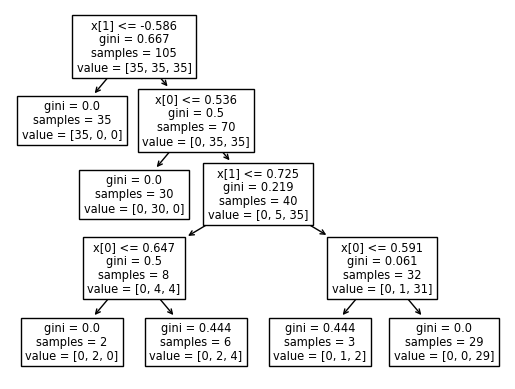

In [18]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

# Random Forest

Random forest is an **ensemble** of decision trees. The step-by-step guide of how random forest algorithm works is as follows:
1. Take $n$ random bootstrap samples **with replacement**. $n$ is normally equal to the **number of samples**.
2. Train a decision tree using previously chosen bootstrap samples. In each node:
    - 2.1 Choose random $d$ features **without replacement**. $d$ is normally equal to the **square root of features**. 
    - 2.2 Make a decision based on the objective function you decided (e.g. maximize the information gain).
3. Repeat previous steps $k$ times. $k$ is the only hyperparameter to choose in this algorithm.
4. Make an average of all $k$ decision trees using majority voting and allocate class labels.

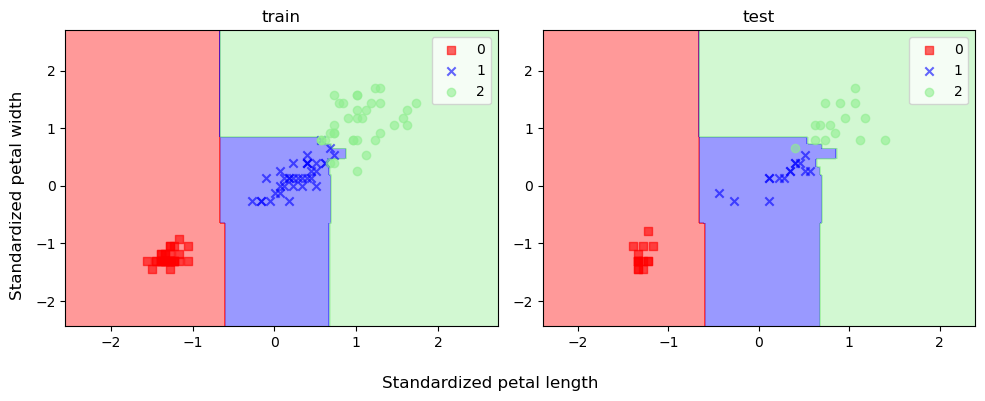

In [19]:
from sklearn.ensemble import RandomForestClassifier
# use 25 decision trees with gini impurity
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(x_train_std, y_train)
utils.visualize_decision_boundary(x_train_std, y_train, classifier=forest, \
                                  x_test=x_test_std, y_test=y_test, \
                                  xlabel="Standardized petal length", ylabel="Standardized petal width")

# K-Nearest Neighbor

Unlike other previous classification models we have seen before, the k-nearest neighbors (KNN) algorithm is a non-parametric and instance-based model where it stores all the training dataset instead of learning from it. Therefore, the KNN algorithm doesn't require any computation resources at all. This kind of algorithm is typically referred to as a family of **lazy learning**.

A simple step-by-step guide of how the KNN algorithm works is as follows:
1. Determine the value $k$ and the distance metric.
2. Find $k$ neighbors. The value $k$ is the number of neighbors around a specific query point to use to determine the class label of that point.
3. After majority voting, allocate the class label of each sample.
4. Repeat above steps until all samples are assigned to their class labels.

Reference: https://www.ibm.com/topics/knn

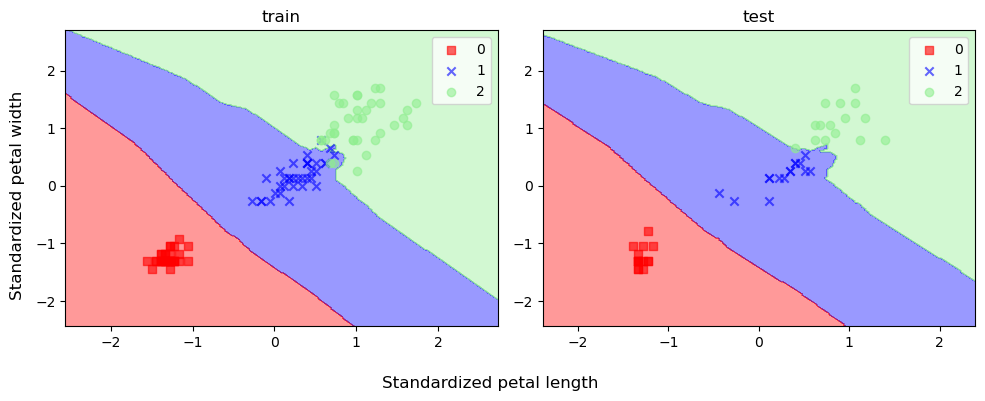

In [20]:
from sklearn.neighbors import KNeighborsClassifier
# minkowski distance is the generalized form of euclidean and manhattan distance metrics
# set p=2 to use euclidean distance, p=1 for manhattan distance
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train_std, y_train)
utils.visualize_decision_boundary(x_train_std, y_train, classifier=knn, \
                                  x_test=x_test_std, y_test=y_test, \
                                  xlabel="Standardized petal length", ylabel="Standardized petal width")